## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [3]:
heart.shape

(4238, 16)

In [4]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [6]:
# answer below:
#dropping null values
heart = heart.dropna()
heart.shape

(3656, 16)

Then, we split the data into train and test with 20% of the data in the test subset.

In [7]:
# answer below:
from sklearn.model_selection import train_test_split
X = heart.drop(['TenYearCHD'], axis=1)
y = heart['TenYearCHD']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We will then scale the data using the standard scaler. Do this in the cell below.

In [8]:
# answer below:
#scale data using standard scaler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [20]:
# answer below:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#polynomial SVC
C_list = [0.01, 0.1, 1.0, 10, 100]
for i in C_list:
  svc_p = SVC(C=i, kernel='poly', gamma='auto')
  svc_p.fit(X_train_scale, y_train)
  print('C=', i)
  print('Train score:', svc_p.score(X_train_scale, y_train))
  print('Test score:', svc_p.score(X_test_scale, y_test))

time_start = time.time()
print('Polynomial time: {}'.format(time.time()-time_start))

C= 0.01
Train score: 0.8512311901504788
Test score: 0.855191256830601
C= 0.1
Train score: 0.8584131326949385
Test score: 0.8579234972677595
C= 1.0
Train score: 0.872093023255814
Test score: 0.8524590163934426
C= 10
Train score: 0.88406292749658
Test score: 0.8306010928961749
C= 100
Train score: 0.8997948016415869
Test score: 0.8237704918032787
Polynomial time: 9.799003601074219e-05


In [21]:
#rbf SVC
C_list = [0.01, 0.1, 1.0, 10, 100]
for i in C_list:
  svc_rbf = SVC(C=i, kernel='rbf', gamma='auto')
  svc_rbf.fit(X_train_scale, y_train)
  print('C=', i)
  print('Train score:', svc_rbf.score(X_train_scale, y_train))
  print('Test score:', svc_rbf.score(X_test_scale, y_test))

start_time = time.time()
print('RBF runtime: {}'.format(time.time()-start_time))

C= 0.01
Train score: 0.8457592339261286
Test score: 0.855191256830601
C= 0.1
Train score: 0.8457592339261286
Test score: 0.855191256830601
C= 1.0
Train score: 0.8604651162790697
Test score: 0.8524590163934426
C= 10
Train score: 0.8974008207934336
Test score: 0.8333333333333334
C= 100
Train score: 0.9449384404924761
Test score: 0.7950819672131147
RBF runtime: 4.649162292480469e-05


Which model overfits more? How would you improve the overfitting?

Look at a classification report and confusion matrix. How does the class balance affect your results?

In [30]:
#poly C=1
poly = SVC(kernel='poly', gamma='auto')
poly.fit(X_train_scale, y_train)
y_pred = poly.predict(X_test_scale)

In [28]:
poly.classes_

array([0, 1])

In [27]:
#rbf C=1
rbf = SVC(kernel='rbf', gamma='auto')
rbf.fit(X_train_scale, y_train)
y_pred2 = rbf.predict(X_test_scale)

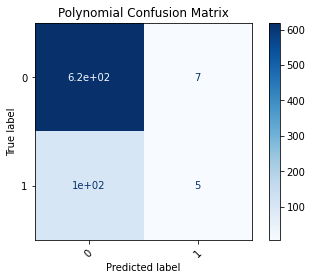

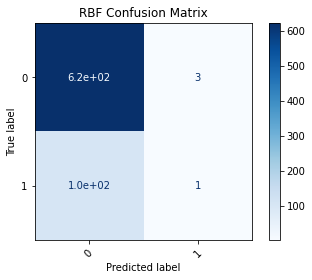

In [32]:
# answer below:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#confusion matrix for poly with C=1
cm_train = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(poly, X_test_scale, y_test, cmap='Blues', xticks_rotation=45)
plt.title('Polynomial Confusion Matrix')

#confusion matrix for rbf
cm_test = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(rbf, X_test_scale, y_test, cmap='Blues', xticks_rotation=45)
plt.title('RBF Confusion Matrix')
plt.show()

In [34]:
from sklearn.metrics import classification_report
#classification report
print('Classification report for Polynomial model:')
print(classification_report(y_test, y_pred))
print('----------------------------------')
print('Classification report for RBF model:')
print(classification_report(y_test, y_pred2))

Classification report for Polynomial model:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       626
           1       0.42      0.05      0.08       106

    accuracy                           0.85       732
   macro avg       0.64      0.52      0.50       732
weighted avg       0.80      0.85      0.80       732

----------------------------------
Classification report for RBF model:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       626
           1       0.25      0.01      0.02       106

    accuracy                           0.85       732
   macro avg       0.55      0.50      0.47       732
weighted avg       0.77      0.85      0.79       732



The polynomial model takes longer in the runtime than the RBF. Also it seems that the polynomial overfits a bit more than the RBF.
The number of observations for each class are severly disproportional. The numbers for the precision and recall are much lower in the "1" (has CHD) class than the 0 (does not have CHD). 